In [15]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import cv2
import glob
from copy import deepcopy

In [19]:
DATA_PATH = r'C:\DATA_Python\endoscope\DAVIS\JPEG_480p\bear'

In [20]:
N_data = glob.glob(DATA_PATH + '/*.jpg')

In [21]:
#bgr이미지임
test_img = cv2.imread(N_data[0], cv2.IMREAD_COLOR)

red = deepcopy(test_img)
red[:,:,1] = 0
red[:,:,2] = 0
cv2.imshow('r',red)
cv2.waitKey(0)

-1

In [38]:
test_bear1 = deepcopy(test_img)

test_bear1[:,:,2] = test_bear1[...,2]*1
test_bear1[...,1] = test_bear1[...,1]*0.5
test_bear1[...,0] = test_bear1[...,0]*0.5

In [47]:
img_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape

In [49]:
width

854

In [59]:
test_bear2[...,2][0][101]

63

In [107]:
#각각의 픽셀을 확인하면서 b,g,r 수정

test_bear2 = deepcopy(test_img)

for i in range(height):
    for k in range(width):
        if (0 < test_bear2[...,2][i][k] and test_bear2[...,2][i][k] <150):
            test_bear2[...,2][i][k] = test_bear2[...,2][i][k] + 100

test_bear2[...,0] = test_bear2[...,0] * 0.5
test_bear2[...,1] = test_bear2[...,1] * 0.5

In [110]:
cv2.imshow('t',test_bear2)
cv2.waitKey(0)

-1

Flattened feature vector size: 768 


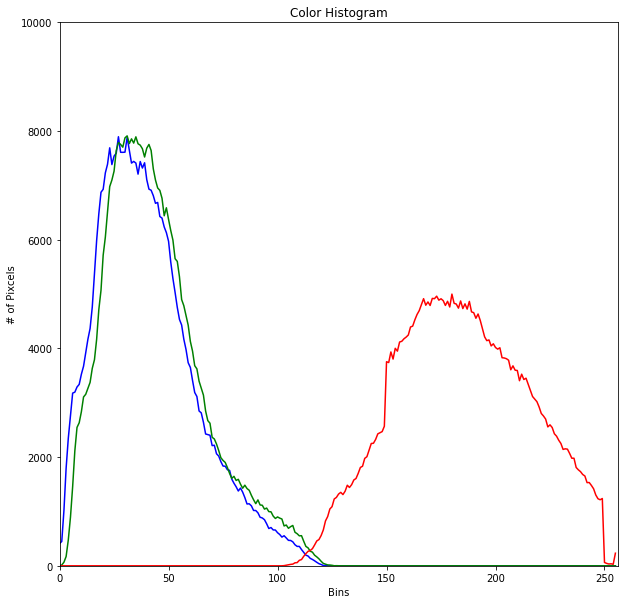

In [108]:
chans = cv2.split(test_bear2)
colors = ("b", "g", "r")
plt.figure(figsize=[10,10])
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixcels")
plt.ylim(0, 10000)

features = []
 
for(chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    plt.plot(hist, color = color)
    
    #r,g,b가 0인 것은 검은색으로 인지
    plt.xlim([0, 256])
 
print("Flattened feature vector size: %d " %(np.array(features).flatten().shape))
plt.show()

Flattened feature vector size: 768 


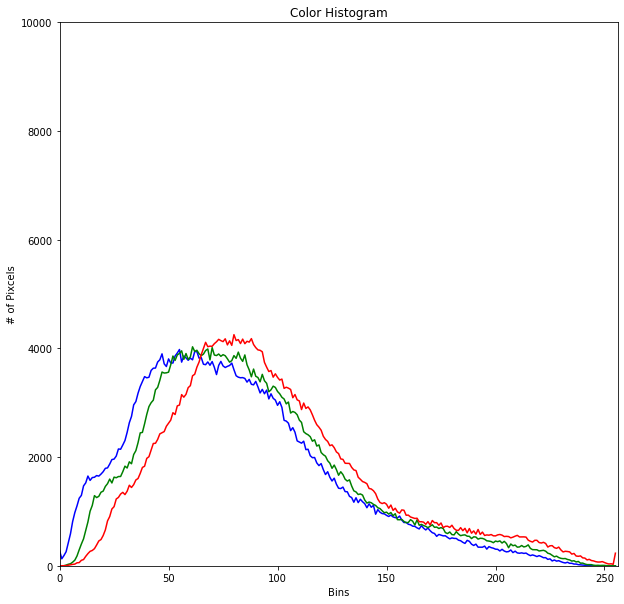

In [73]:
chans = cv2.split(test_img)
colors = ("b", "g", "r")
plt.figure(figsize=[10,10])
plt.title("Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixcels")
plt.ylim(0, 10000)

features = []
 
for(chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    features.extend(hist)
 
    plt.plot(hist, color = color)
    
    #r,g,b가 0인 것은 검은색으로 인지
    plt.xlim([0, 256])
 
print("Flattened feature vector size: %d " %(np.array(features).flatten().shape))
plt.show()